# FIAP
## Engenharia de Software
####-Márcio Tahyra || RM:552511
Criar scatter plot com os dados sobre o mundo do Gapmind em https://www.gapminder.org/data/, escolher os indicadores de sua preferência. Lembre que o scatter plot mostra 4 dimensões de dados: x, y, tamanho da bolinha e cor.



Importando e carregando os arquivos

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

expec = pd.read_csv('expec.csv')
pop = pd.read_csv('pop.csv')
pib = pd.read_csv('pib.csv')
area = pd.read_csv('area.csv')

Pegando os dados de 2020

In [37]:
ano = '2020'
expec_2020 = expec[['country', ano]].rename(columns={ano: 'Life expectancy'})
pop_2020 = pop[['country', ano]].rename(columns={ano: 'Population'})
pib_2020 = pib[['country', ano]].rename(columns={ano: 'GDP per capita'})
area_2020 = area[['country', '2020']].rename(columns={'2020': 'Area'})

Arrumando as unidade para numérico

In [38]:
pop_2020['Population'] = pop_2020['Population'].replace({'M': 'e6', 'k': 'e3', 'B': 'e9'}, regex=True).astype(float)
area_2020['Area'] = area_2020['Area'].replace({'M': 'e6', 'k': 'e3'}, regex=True).astype(float)

Juntando dados em um df

In [39]:
data = expec_2020.merge(pop_2020, on='country').merge(pib_2020, on='country').merge(area_2020, on='country')

Preparando gráfico

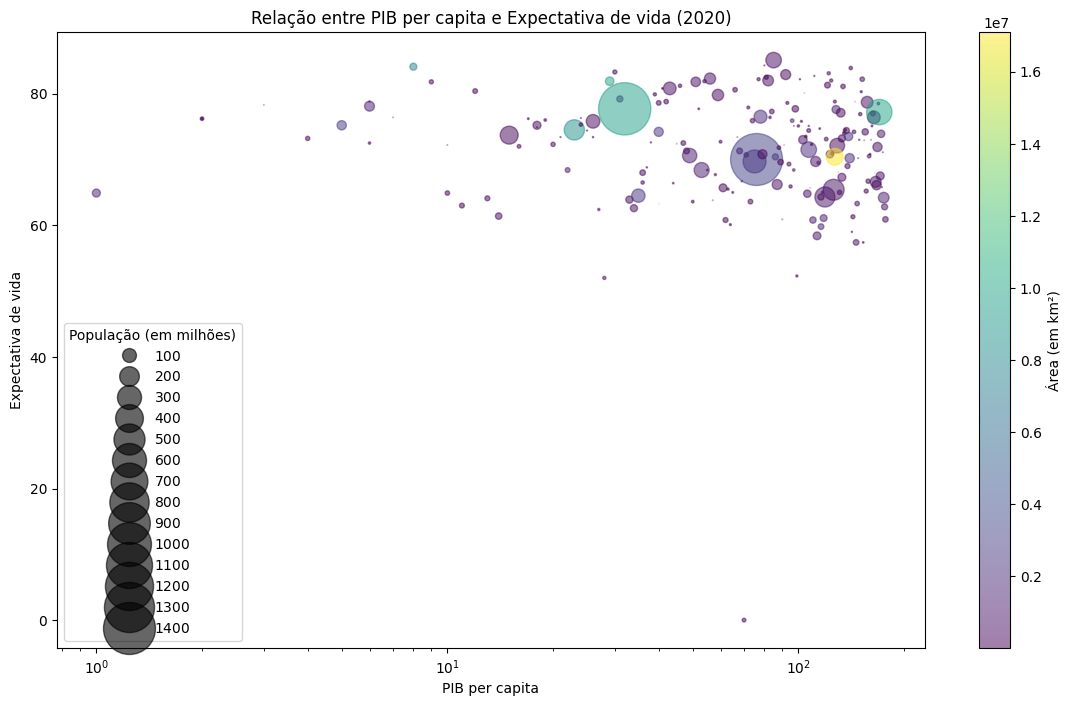

In [40]:
plt.figure(figsize=(14, 8))
scatter = plt.scatter(data['GDP per capita'], data['Life expectancy'], s=data['Population'] / 1e6, c=data['Area'],
                      alpha=0.5, cmap='viridis')
plt.xscale('log')
plt.xlabel('PIB per capita')
plt.ylabel('Expectativa de vida')
plt.title('Relação entre PIB per capita e Expectativa de vida (2020)')
plt.colorbar(scatter, label='Área (em km²)')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend = plt.legend(handles, labels, title="População (em milhões)")

plt.show()